# FUNDAMENTAL OF DATA SCIENCE PROJECT 2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import important libraries and Load the dataset

In [2]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [3]:
# Load the datasets
train_df  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FDS Projects/preprocessed_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FDS Projects/preprocessed_test.csv')

## Data Information

In [4]:
# First 5 rows on train dataset
train_df .head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,albury,13.4,22.9,0.6,4.8,8.4,12.0,44.0,12.0,13.0,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,albury,7.4,25.1,0.0,4.8,8.4,13.0,44.0,15.0,11.0,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,albury,17.5,32.3,1.0,4.8,8.4,12.0,41.0,3.0,14.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
3,albury,14.6,29.7,0.2,4.8,8.4,13.0,56.0,12.0,12.0,...,55.0,23.0,1009.2,1005.4,5.0,5.0,20.6,28.9,0,0
4,albury,7.7,26.7,0.0,4.8,8.4,12.0,35.0,7.0,12.0,...,48.0,19.0,1013.4,1010.1,5.0,5.0,16.3,25.5,0,0


In [5]:
len(train_df .columns)

22

In [6]:
# Check missing values in the training dataset
missing_values_train = train_df .isnull().sum()
print("Missing Values in Training Dataset:")
print(missing_values_train)

Missing Values in Training Dataset:
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


In [7]:
# First 5 rows on test dataset
test_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,albury,12.9,25.7,0.0,4.8,8.5,11.0,46.0,12.0,11.0,...,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0
1,albury,9.2,28.0,0.0,4.8,8.5,2.0,24.0,6.0,4.0,...,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0
2,albury,14.3,25.0,0.0,4.8,8.5,12.0,50.0,10.0,12.0,...,24.0,49.0,19.0,1009.6,1008.2,1.0,5.0,18.1,24.6,0
3,albury,9.7,31.9,0.0,4.8,8.5,15.0,80.0,6.0,14.0,...,28.0,42.0,9.0,1008.9,1003.6,5.0,5.0,18.3,30.2,0
4,albury,15.9,18.6,15.6,4.8,8.5,12.0,61.0,15.0,15.0,...,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,1


In [8]:
len(test_df.columns)

21

In [9]:
# Check missing values in the test dataset
missing_values_train = test_df.isnull().sum()
print("Missing Values in Training Dataset:")
print(missing_values_train)

Missing Values in Training Dataset:
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64


## Data Preprocessing

In [4]:
# Separate features and target variable in training data
X_train = train_df.drop(columns=['RainTomorrow'])
y_train = train_df['RainTomorrow']

# Separate features in test data
X_test = test_df

In [5]:
# Identify numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Transform the datasets
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {title}')
    plt.show()

# Function to plot ROC and AUC
def plot_roc_auc(model, X_test, y_test, title):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {title}')
    plt.legend(loc="lower right")
    plt.show()

# Function to plot feature importance
def plot_feature_importance(importance, features, title):
    feature_importance = pd.Series(importance, index=features).sort_values(ascending=False)
    print(f"{title} Feature Importances:\n", feature_importance)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance, y=feature_importance.index)
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title(f'Visualizing Important Features - {title}')
    plt.show()

# Function to evaluate the model and return accuracy
def evaluate_model_and_save_accuracy(model, X_train, y_train, X_test, model_name, model_accuracies):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred_train)
    model_accuracies[model_name] = accuracy
    return model

# Function to evaluate the model using cross-validation and save accuracy
def evaluate_model_with_cv(model, X, y, model_name, model_accuracies, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    mean_accuracy = scores.mean()
    model_accuracies[model_name] = mean_accuracy
    return model

# Dictionary to store model accuracies
model_accuracies = {}

## Modeling

In [6]:
# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True, random_state=42),
    'Neural Network': MLPClassifier(max_iter=300, random_state=42)
}

# Dictionary to store model accuracies
model_accuracies = {}

# Placeholder to store predicted probabilities for ROC and AUC
y_test_proba = {}

### Decision Tree without Cross-Validation

Evaluating Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     77157
           1       1.00      1.00      1.00     77157

    accuracy                           1.00    154314
   macro avg       1.00      1.00      1.00    154314
weighted avg       1.00      1.00      1.00    154314

Decision Tree Feature Importances:
 Humidity3pm              0.271903
Rainfall                 0.086245
Sunshine                 0.081048
Pressure3pm              0.066739
Cloud3pm                 0.059147
                           ...   
Location_townsville      0.000453
Location_darwin          0.000437
Location_alicesprings    0.000354
Location_uluru           0.000297
Location_katherine       0.000147
Length: 69, dtype: float64


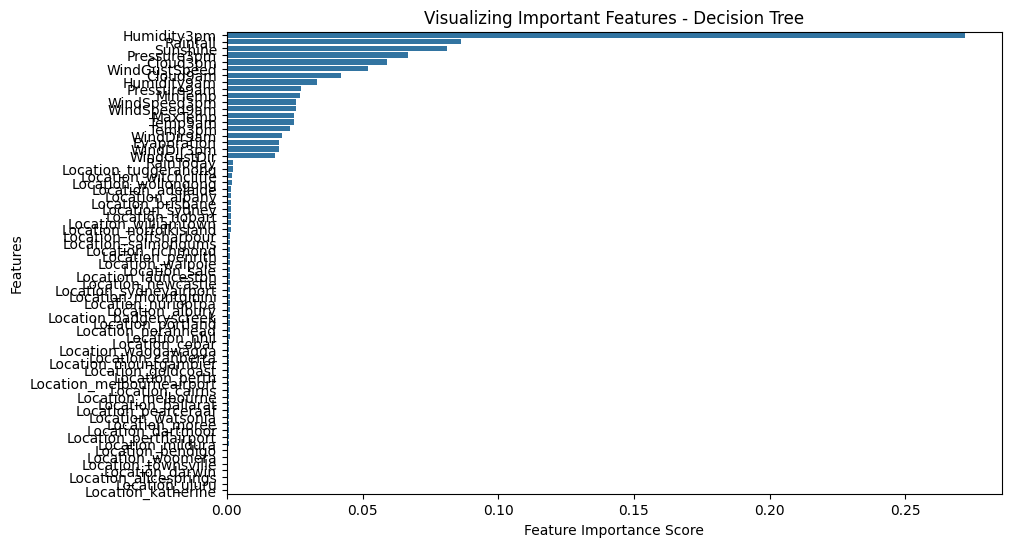

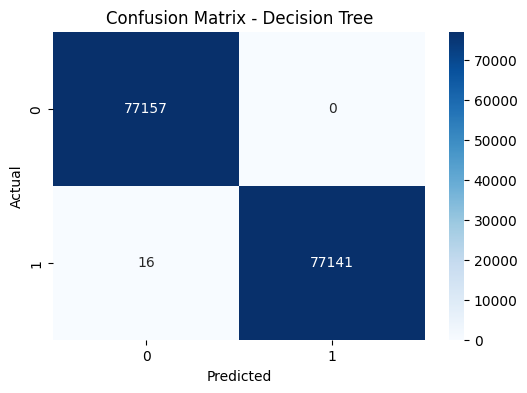

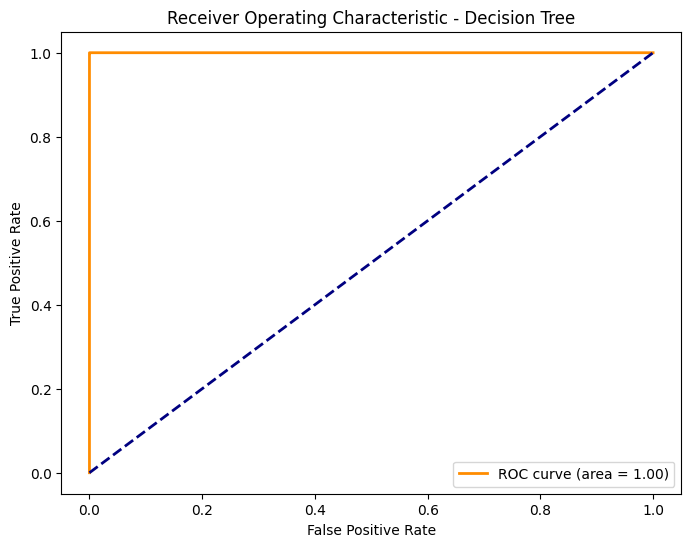

In [17]:
# Initialize and evaluate Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
print("Evaluating Decision Tree")
decision_tree_model = evaluate_model_and_save_accuracy(decision_tree_model, X_train_transformed, y_train, X_test_transformed, 'Decision Tree', model_accuracies)

# Predict on training data
y_pred_train = decision_tree_model.predict(X_train_transformed)

# Print classification report for the training set
print(classification_report(y_train, y_pred_train))

# Plot feature importance
feature_names = numerical_cols.tolist() + preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist()
plot_feature_importance(decision_tree_model.feature_importances_, feature_names, 'Decision Tree')

# Plot confusion matrix for the training set
plot_confusion_matrix(y_train, y_pred_train, 'Decision Tree')

# Plot ROC and AUC for the training set
plot_roc_auc(decision_tree_model, X_train_transformed, y_train, 'Decision Tree')

# Predict on test data
y_pred_test = decision_tree_model.predict(X_test_transformed)

# Save the model
with open('/content/drive/MyDrive/Colab Notebooks/FDS Projects/Decision_Tree_model.pkl', 'wb') as file:
    pickle.dump(decision_tree_model, file)

# Save predictions for the test set
test_df['RainTomorrow'] = y_pred_test
test_df.to_csv('/content/drive/MyDrive/Colab Notebooks/FDS Projects/Decision_Tree_predictions.csv', index=False)

### Decision Tree with Cross-Validation

Evaluating Decision Tree with Cross-Validation
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     77157
           1       1.00      1.00      1.00     77157

    accuracy                           1.00    154314
   macro avg       1.00      1.00      1.00    154314
weighted avg       1.00      1.00      1.00    154314

Decision Tree (CV) Feature Importances:
 Humidity3pm              0.271903
Rainfall                 0.086245
Sunshine                 0.081048
Pressure3pm              0.066739
Cloud3pm                 0.059147
                           ...   
Location_townsville      0.000453
Location_darwin          0.000437
Location_alicesprings    0.000354
Location_uluru           0.000297
Location_katherine       0.000147
Length: 69, dtype: float64


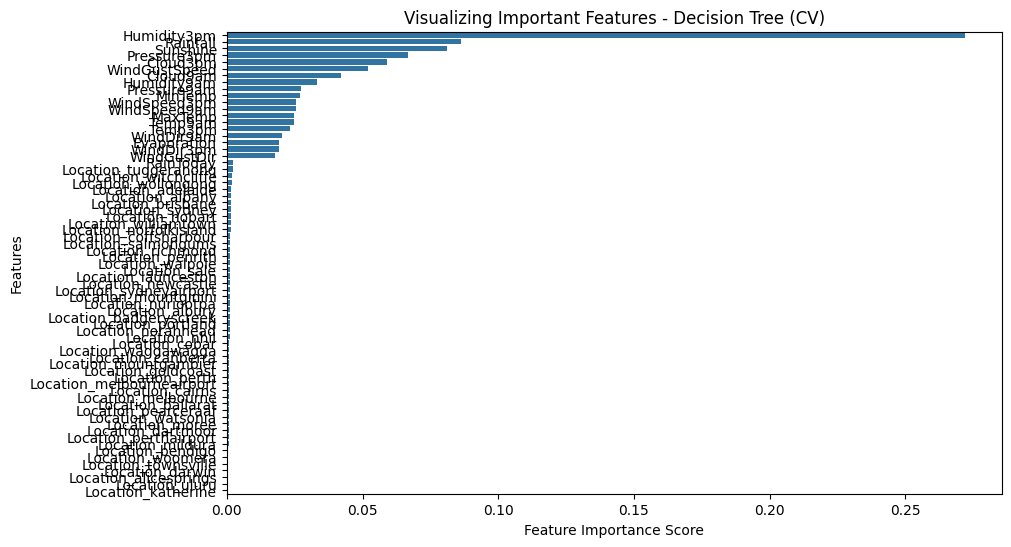

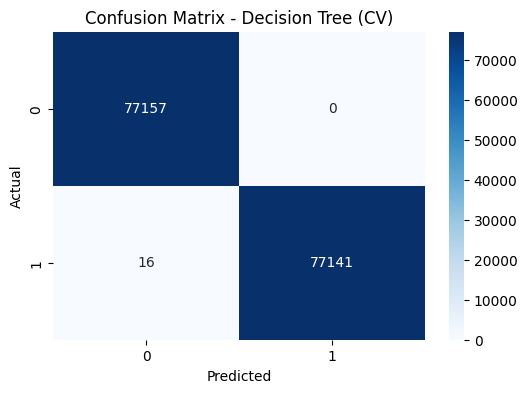

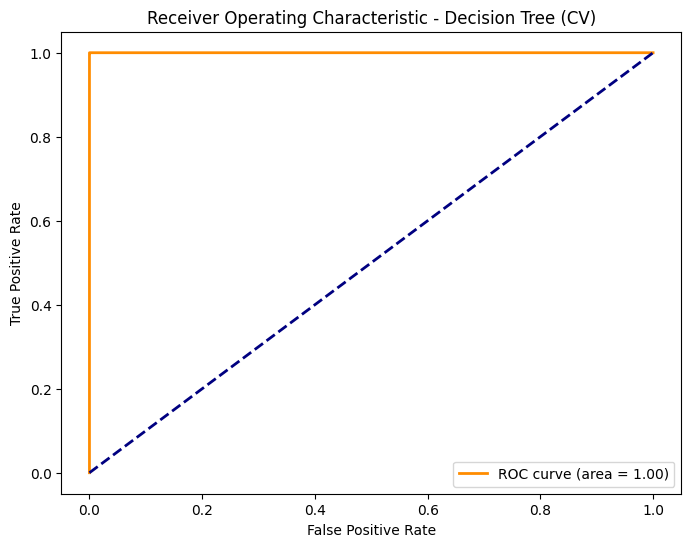

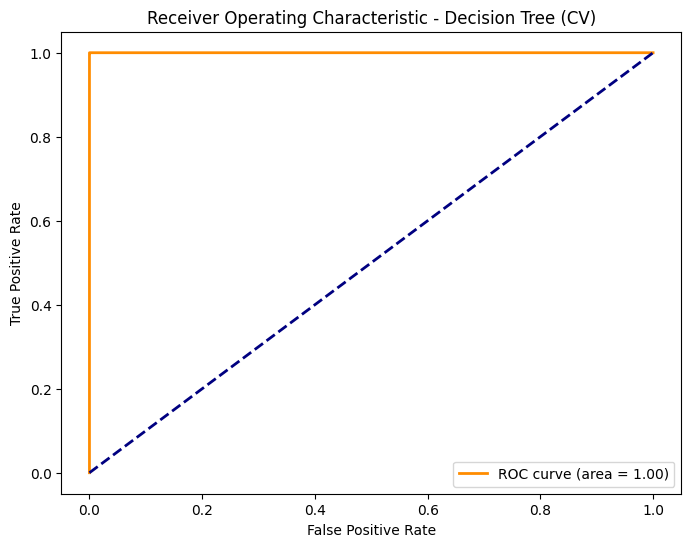

In [18]:
# Initialize and evaluate Decision Tree with cross-validation
decision_tree_model = DecisionTreeClassifier(random_state=42)
print("Evaluating Decision Tree with Cross-Validation")
decision_tree_model = evaluate_model_with_cv(decision_tree_model, X_train_transformed, y_train, 'Decision Tree (CV)', model_accuracies)

# Train and predict on the full training data for other evaluations
decision_tree_model.fit(X_train_transformed, y_train)
y_pred_train = decision_tree_model.predict(X_train_transformed)

# Print classification report for the training set
print(classification_report(y_train, y_pred_train))

# Plot feature importance
feature_names = numerical_cols.tolist() + preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist()
plot_feature_importance(decision_tree_model.feature_importances_, feature_names, 'Decision Tree (CV)')

# Plot confusion matrix for the training set
plot_confusion_matrix(y_train, y_pred_train, 'Decision Tree (CV)')

# Plot ROC and AUC for the training set
plot_roc_auc(decision_tree_model, X_train_transformed, y_train, 'Decision Tree (CV)')

# Plot ROC and AUC for the training set
plot_roc_auc(decision_tree_model, X_train_transformed, y_train, 'Decision Tree (CV)')

# Predict on test data
y_pred_test = decision_tree_model.predict(X_test_transformed)

# Save the model
with open('/content/drive/MyDrive/Colab Notebooks/FDS Projects/Decision_Tree_model_cv.pkl', 'wb') as file:
    pickle.dump(decision_tree_model, file)

# Save predictions for the test set
test_df['RainTomorrow'] = y_pred_test
test_df.to_csv('/content/drive/MyDrive/Colab Notebooks/FDS Projects/Decision_Tree_predictions_cv.csv', index=False)

### Neural Network without Cross-Validation

Evaluating Neural Network
              precision    recall  f1-score   support

           0       0.89      0.88      0.88     77157
           1       0.88      0.89      0.88     77157

    accuracy                           0.88    154314
   macro avg       0.88      0.88      0.88    154314
weighted avg       0.88      0.88      0.88    154314



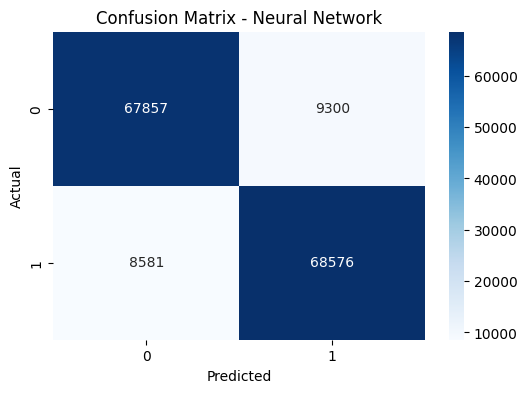

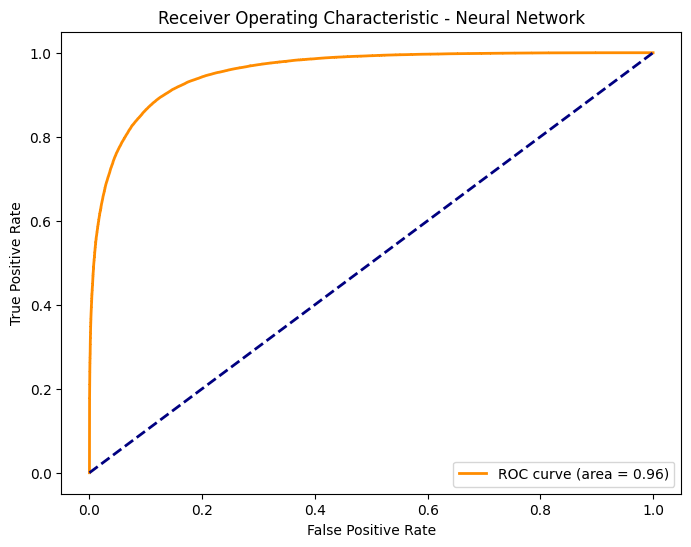

In [7]:
# Initialize and evaluate Neural Network
neural_network_model = MLPClassifier(max_iter=1000, solver='adam', learning_rate='adaptive', random_state=42)
print("Evaluating Neural Network")
neural_network_model = evaluate_model_and_save_accuracy(neural_network_model, X_train_transformed, y_train, X_test_transformed, 'Neural Network', model_accuracies)

# Predict on training data
y_pred_train = neural_network_model.predict(X_train_transformed)

# Print classification report for the training set
print(classification_report(y_train, y_pred_train))

# Plot confusion matrix for the training set
plot_confusion_matrix(y_train, y_pred_train, 'Neural Network')

# Plot ROC and AUC for the training set
plot_roc_auc(neural_network_model, X_train_transformed, y_train, 'Neural Network')

# Predict on test data
y_pred_test = neural_network_model.predict(X_test_transformed)

# Save the model
with open('/content/drive/MyDrive/Colab Notebooks/FDS Projects/Neural_Network_model.pkl', 'wb') as file:
    pickle.dump(neural_network_model, file)

# Save predictions for the test set
test_df['RainTomorrow'] = y_pred_test
test_df.to_csv('/content/drive/MyDrive/Colab Notebooks/FDS Projects/Neural_Network_predictions.csv', index=False)

### Neural Network with Cross-Validation

Evaluating Neural Network with Cross-Validation
              precision    recall  f1-score   support

           0       0.89      0.88      0.88     77157
           1       0.88      0.89      0.88     77157

    accuracy                           0.88    154314
   macro avg       0.88      0.88      0.88    154314
weighted avg       0.88      0.88      0.88    154314



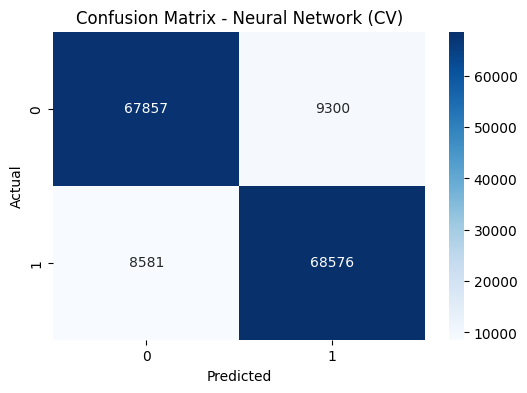

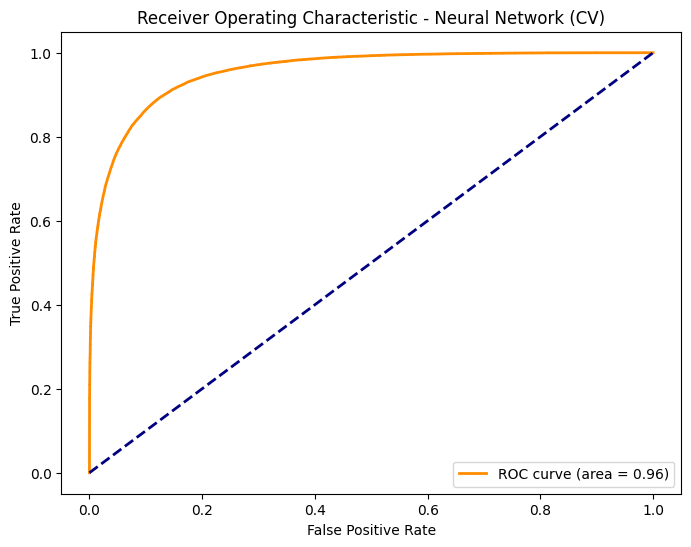

In [14]:
# Initialize and evaluate Neural Network with cross-validation
neural_network_model = MLPClassifier(max_iter=1000, solver='adam', learning_rate='adaptive', random_state=42)
print("Evaluating Neural Network with Cross-Validation")
neural_network_model = evaluate_model_with_cv(neural_network_model, X_train_transformed, y_train, 'Neural Network (CV)', model_accuracies)

# Train and predict on the full training data for other evaluations
neural_network_model.fit(X_train_transformed, y_train)
y_pred_train = neural_network_model.predict(X_train_transformed)

# Print classification report for the training set
print(classification_report(y_train, y_pred_train))

# Plot confusion matrix for the training set
plot_confusion_matrix(y_train, y_pred_train, 'Neural Network (CV)')

# Plot ROC and AUC for the training set
plot_roc_auc(neural_network_model, X_train_transformed, y_train, 'Neural Network (CV)')

# Predict on test data
y_pred_test = neural_network_model.predict(X_test_transformed)

# Save the model
with open('/content/drive/MyDrive/Colab Notebooks/FDS Projects/Neural_Network_model_cv.pkl', 'wb') as file:
    pickle.dump(neural_network_model, file)

# Save predictions for the test set
test_df['RainTomorrow'] = y_pred_test
test_df.to_csv('/content/drive/MyDrive/Colab Notebooks/FDS Projects/Neural_Network_predictions_cv.csv', index=False)

### Naive Bayes without Cross-Validation

Evaluating Naive Bayes
              precision    recall  f1-score   support

           0       0.71      0.59      0.64     77157
           1       0.65      0.77      0.70     77157

    accuracy                           0.68    154314
   macro avg       0.68      0.68      0.67    154314
weighted avg       0.68      0.68      0.67    154314



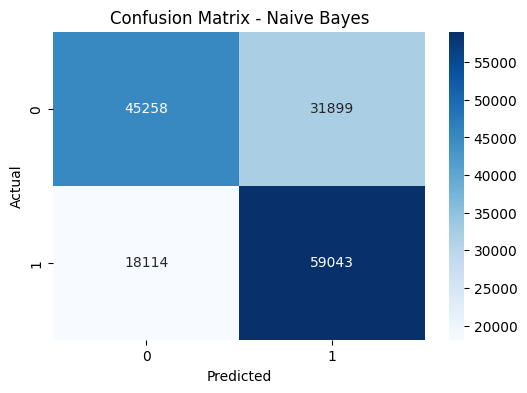

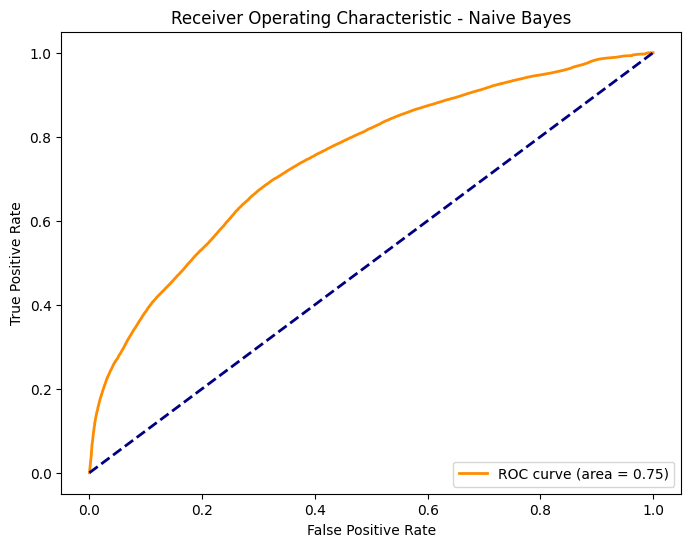

In [9]:
# Initialize and evaluate Naive Bayes
naive_bayes_model = GaussianNB()
print("Evaluating Naive Bayes")
naive_bayes_model = evaluate_model_and_save_accuracy(naive_bayes_model, X_train_transformed, y_train, X_test_transformed, 'Naive Bayes', model_accuracies)

# Predict on training data
y_pred_train = naive_bayes_model.predict(X_train_transformed)

# Print classification report for the training set
print(classification_report(y_train, y_pred_train))

# Plot confusion matrix for the training set
plot_confusion_matrix(y_train, y_pred_train, 'Naive Bayes')

# Plot ROC and AUC for the training set
plot_roc_auc(naive_bayes_model, X_train_transformed, y_train, 'Naive Bayes')

# Predict on test data
y_pred_test = naive_bayes_model.predict(X_test_transformed)

# Save the model
with open('/content/drive/MyDrive/Colab Notebooks/FDS Projects/Naive_Bayes_model.pkl', 'wb') as file:
    pickle.dump(naive_bayes_model, file)

# Save predictions for the test set
test_df['RainTomorrow'] = y_pred_test
test_df.to_csv('/content/drive/MyDrive/Colab Notebooks/FDS Projects/Naive_Bayes_predictions.csv', index=False)

### Naive Bayes with Cross-Validation

Evaluating Naive Bayes with Cross-Validation
              precision    recall  f1-score   support

           0       0.71      0.59      0.64     77157
           1       0.65      0.77      0.70     77157

    accuracy                           0.68    154314
   macro avg       0.68      0.68      0.67    154314
weighted avg       0.68      0.68      0.67    154314



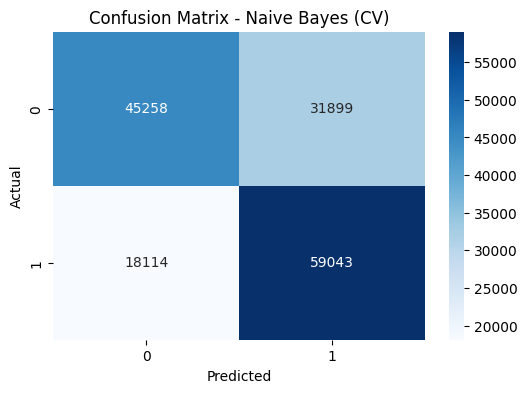

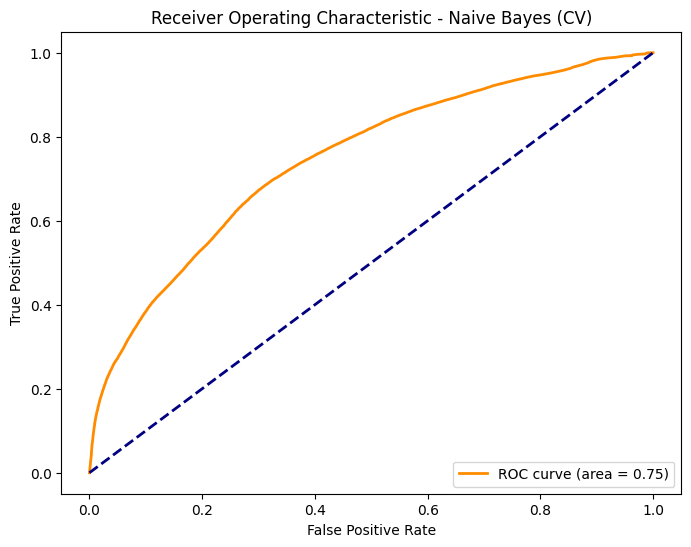

In [10]:
# Initialize and evaluate Naive Bayes with cross-validation
naive_bayes_model = GaussianNB()
print("Evaluating Naive Bayes with Cross-Validation")
naive_bayes_model = evaluate_model_with_cv(naive_bayes_model, X_train_transformed, y_train, 'Naive Bayes (CV)', model_accuracies)

# Train and predict on the full training data for other evaluations
naive_bayes_model.fit(X_train_transformed, y_train)
y_pred_train = naive_bayes_model.predict(X_train_transformed)

# Print classification report for the training set
print(classification_report(y_train, y_pred_train))

# Plot confusion matrix for the training set
plot_confusion_matrix(y_train, y_pred_train, 'Naive Bayes (CV)')

# Plot ROC and AUC for the training set
plot_roc_auc(naive_bayes_model, X_train_transformed, y_train, 'Naive Bayes (CV)')

# Predict on test data
y_pred_test = naive_bayes_model.predict(X_test_transformed)

# Save the model
with open('/content/drive/MyDrive/Colab Notebooks/FDS Projects/Naive_Bayes_model_cv.pkl', 'wb') as file:
    pickle.dump(naive_bayes_model, file)

# Save predictions for the test set
test_df['RainTomorrow'] = y_pred_test
test_df.to_csv('/content/drive/MyDrive/Colab Notebooks/FDS Projects/Naive_Bayes_predictions_cv.csv', index=False)

### Support Vector Machine (SVM) without Cross-Validation

Evaluating SVM
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     23882
           1       0.83      0.50      0.62      6980

    accuracy                           0.86     30862
   macro avg       0.85      0.73      0.77     30862
weighted avg       0.86      0.86      0.85     30862



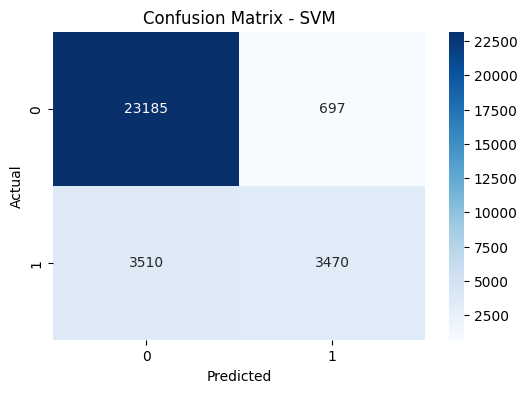

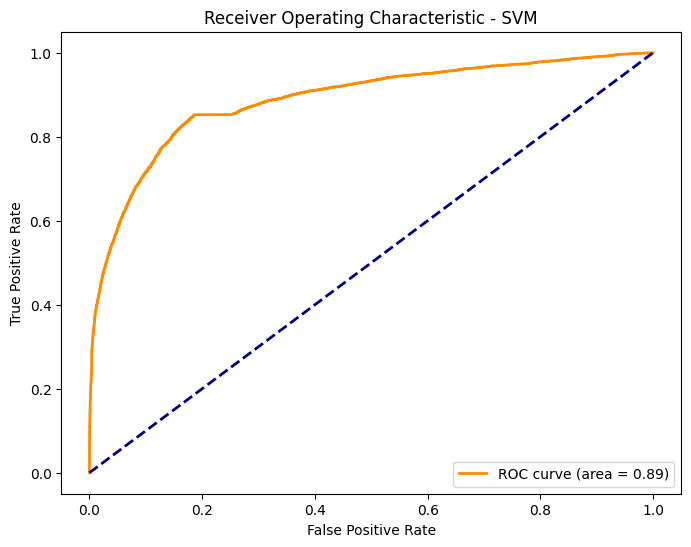

In [11]:
# Take a random sample of the training data to reduce the dataset size
sample_fraction = 0.2  # Use 20% of the data, adjust this fraction as needed
X_train_sampled = X_train_transformed[:int(sample_fraction * len(X_train_transformed))]
y_train_sampled = y_train[:int(sample_fraction * len(y_train))]

# Initialize and evaluate SVM on the sampled data
svm_model = SVC(probability=True, random_state=42)
print("Evaluating SVM")
svm_model = evaluate_model_and_save_accuracy(svm_model, X_train_sampled, y_train_sampled, X_test_transformed, 'SVM', model_accuracies)

# Predict on sampled training data
y_pred_train = svm_model.predict(X_train_sampled)

# Print classification report for the sampled training set
print(classification_report(y_train_sampled, y_pred_train))

# Plot confusion matrix for the sampled training set
plot_confusion_matrix(y_train_sampled, y_pred_train, 'SVM')

# Plot ROC and AUC for the sampled training set
plot_roc_auc(svm_model, X_train_sampled, y_train_sampled, 'SVM')

# Predict on test data
y_pred_test = svm_model.predict(X_test_transformed)

# Save the model
with open('/content/drive/MyDrive/Colab Notebooks/FDS Projects/SVM_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)

# Save predictions for the test set
test_df['RainTomorrow'] = y_pred_test
test_df.to_csv('/content/drive/MyDrive/Colab Notebooks/FDS Projects/SVM_predictions.csv', index=False)

### Support Vector Machine (SVM) with Cross-Validation

Evaluating SVM with Cross-Validation
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     23882
           1       0.83      0.50      0.62      6980

    accuracy                           0.86     30862
   macro avg       0.85      0.73      0.77     30862
weighted avg       0.86      0.86      0.85     30862



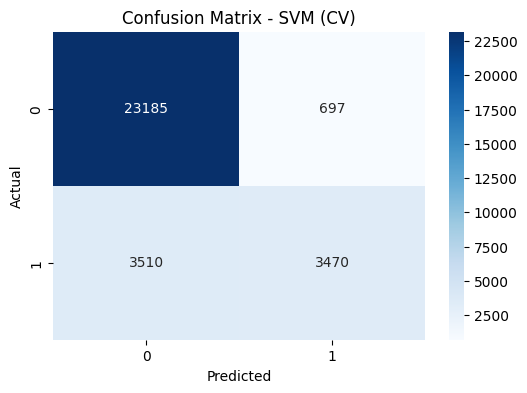

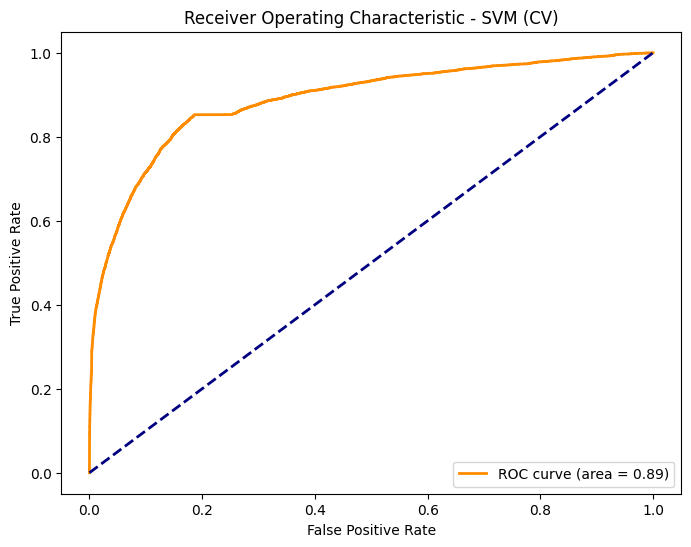

In [12]:
# Take a random sample of the training data to reduce the dataset size
sample_fraction = 0.2  # Use 20% of the data, adjust this fraction as needed
X_train_sampled = X_train_transformed[:int(sample_fraction * len(X_train_transformed))]
y_train_sampled = y_train[:int(sample_fraction * len(y_train))]

# Initialize and evaluate SVM with cross-validation on the sampled data
svm_model = SVC(probability=True, random_state=42)
print("Evaluating SVM with Cross-Validation")
svm_model = evaluate_model_with_cv(svm_model, X_train_sampled, y_train_sampled, 'SVM (CV)', model_accuracies)

# Train and predict on the sampled training data for other evaluations
svm_model.fit(X_train_sampled, y_train_sampled)
y_pred_train = svm_model.predict(X_train_sampled)

# Print classification report for the sampled training set
print(classification_report(y_train_sampled, y_pred_train))

# Plot confusion matrix for the sampled training set
plot_confusion_matrix(y_train_sampled, y_pred_train, 'SVM (CV)')

# Plot ROC and AUC for the sampled training set
plot_roc_auc(svm_model, X_train_sampled, y_train_sampled, 'SVM (CV)')

# Predict on test data
y_pred_test = svm_model.predict(X_test_transformed)

# Save the model
with open('/content/drive/MyDrive/Colab Notebooks/FDS Projects/SVM_model_cv.pkl', 'wb') as file:
    pickle.dump(svm_model, file)

# Save predictions for the test set
test_df['RainTomorrow'] = y_pred_test
test_df.to_csv('/content/drive/MyDrive/Colab Notebooks/FDS Projects/SVM_predictions_cv.csv', index=False)

### Plotting Model Accuracies with and without Cross-Validation

Model Accuracies Dictionary:
{'Neural Network': 0.8841258732195394, 'Neural Network (CV)': 0.44245502290909144, 'Naive Bayes': 0.6759010848011198, 'Naive Bayes (CV)': 0.11809679462663145, 'SVM': 0.8636834942647916, 'SVM (CV)': 0.7635616039115841, 'Decision Tree': 0.999896315305157, 'Decision Tree (CV)': 0.5466452477229812}

Accuracy DataFrame:
                 Model  Accuracy
0       Neural Network  0.884126
1  Neural Network (CV)  0.442455
2          Naive Bayes  0.675901
3     Naive Bayes (CV)  0.118097
4                  SVM  0.863683
5             SVM (CV)  0.763562
6        Decision Tree  0.999896
7   Decision Tree (CV)  0.546645


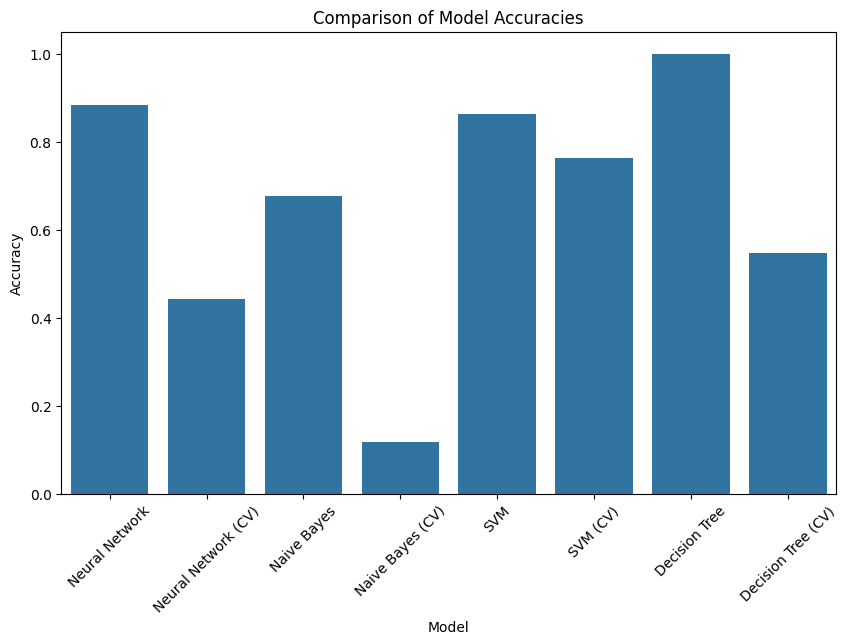

In [19]:
# Print the model accuracies dictionary
print("Model Accuracies Dictionary:")
print(model_accuracies)

# Create a dataframe for models accuracy
accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])

# Check if the dataframe is populated correctly
print("\nAccuracy DataFrame:")
print(accuracy_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df)
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

## Saving the accuracies for all the models

In [20]:
# Save the accuracy dataframe to an Excel file without Cross-Validation
accuracy_df.to_excel('/content/drive/MyDrive/Colab Notebooks/FDS Projects/model_accuracies.xlsx', index=False)
print("Model accuracies saved to 'model_accuracies.xlsx'.")

Model accuracies saved to 'model_accuracies.xlsx'.
